In [9]:
import numpy as np
import matplotlib.pyplot as plt
import re
import os

dic = dict()

In [10]:
def read_numbers_from_file(file_path):
    numbers_list = []
    try:
        with open(file_path, 'r') as file:
            for line in file:
                for number in re.findall(r'[-+]?\d*\.\d+|[-+]?\d+', line):
                    numbers_list.append(float(number))
    except IOError:
        print(f"无法打开或读取文件：{file_path}")
    return numbers_list


def add_element(TYPE, ORDER, numbers):
    if TYPE not in dic:
        dic[TYPE] = dict()
    dic[TYPE][ORDER] = numbers

In [11]:
def find_dat_files(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.dat'):
                file_path = os.path.join(root, file)
                root_split = root.split('_')
                TYPE = root_split[0][len(root_split[0]) - 1]
                ORDER = int(root_split[1])
                numbers = read_numbers_from_file(file_path)
                add_element(TYPE, ORDER, numbers)

# change this directory to '../SPANN/result/SPANN'
directory_to_search = '../SPANN/realResult/SPANN'
find_dat_files(directory_to_search)

In [12]:
colors = ['r', 'g', 'b', 'k']
marker = ['o', 's', 'D', '^']
dic

{'D': {0: [0.743044, 26.0, 0.517546, 26.0],
  1: [1.273459, 36.0, 1.076525, 36.0],
  2: [5.249386, 113.0, 5.098306, 113.0],
  3: [10.036347, 208.0, 9.83391, 208.0],
  4: [12.709246, 265.0, 12.457545, 265.0]},
 'k': {0: [12.672578, 265.0, 12.518997, 265.0],
  1: [12.679965, 265.0, 12.51231, 265.0],
  2: [12.713053, 265.0, 12.47326, 265.0],
  3: [12.723794, 265.0, 12.488096, 265.0],
  4: [12.806345, 265.0, 12.590954, 265.0]},
 'N': {0: [0.252917, 19.0, 0.252682, 19.0],
  1: [1.255021, 39.0, 1.239975, 39.0],
  2: [2.511583, 64.0, 2.473863, 64.0],
  3: [12.682184, 265.0, 12.525576, 265.0],
  4: [22.857149, 467.0, 22.475284, 467.0]},
 'n': {0: [6.420715, 265.0, 6.256192, 265.0],
  1: [12.704981, 265.0, 12.498988, 265.0],
  2: [38.114172, 265.0, 37.564031, 265.0],
  3: [63.538965, 265.0, 62.588019, 265.0],
  4: [130.396701, 265.0, 127.937157, 265.0]}}

In [22]:
scope = {
    'k': [1, 10, 50, 100, 200],
    'n': [5, 10, 30, 50, 100],
    'D': [50, 100, 500, 1000, 1300],
    'N': [1000, 5000, 10000, 50000, 90000],
}

name = {
    'k': 'The k in KNN',
    'n': 'Number of queries',
    'D': 'Dimension of vector',
    'N': 'Total amount of data',
}

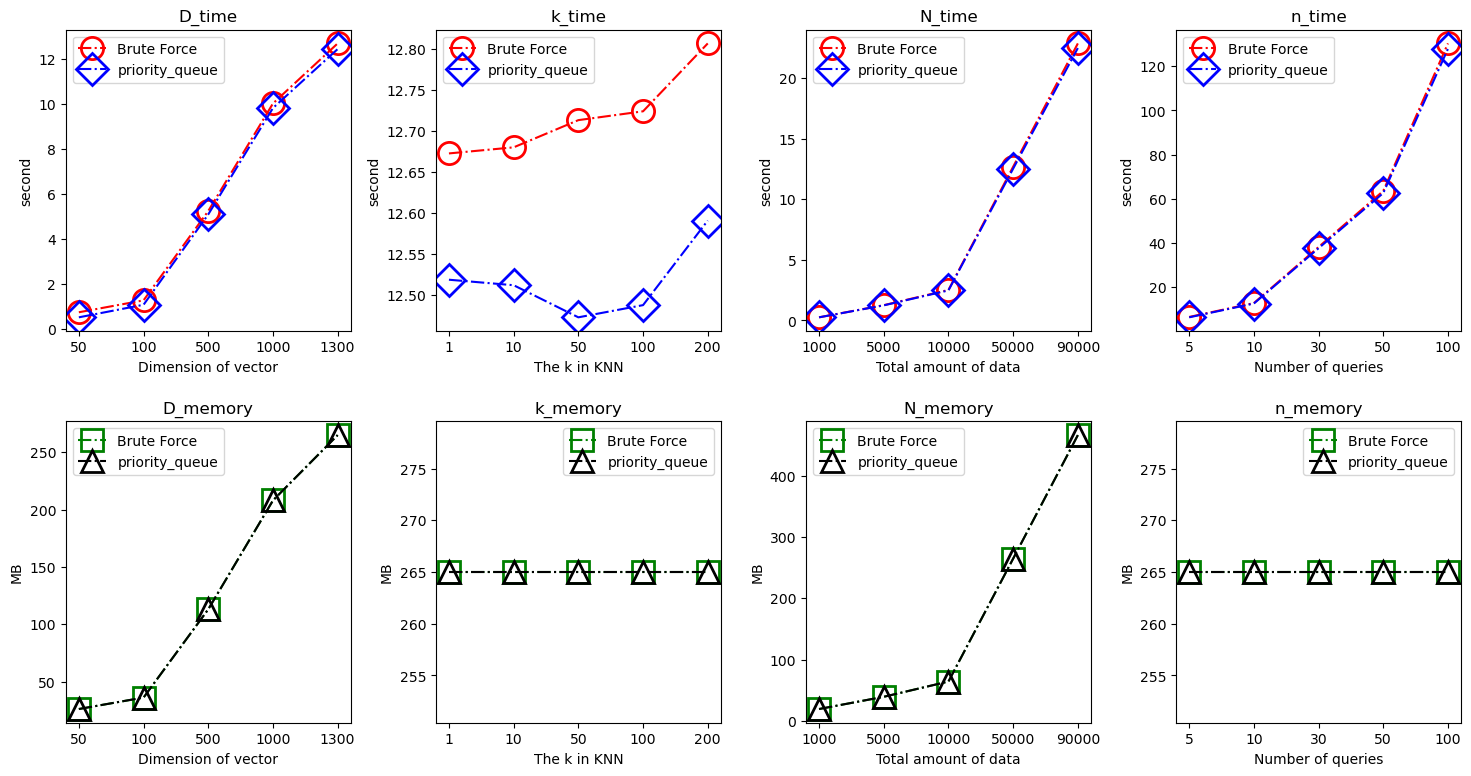

In [27]:
fig, ax = plt.subplots(2, 4, figsize=(18, 9))
for index, key in enumerate(dic):
    x = scope[key]
    x = list(map(str, x))
    tar = dic[key]
    y0 = []
    y1 = []
    y2 = []
    y3 = []
    for i in range(len(x)):
        y0.append(tar[i][0])
        y1.append(tar[i][1])
        y2.append(tar[i][2])
        y3.append(tar[i][3])
    ax[0][index].plot(x, y0, color=colors[0], marker=marker[0], label='brute_force', markersize=16,
                      markerfacecolor='none', markeredgewidth=2, linestyle="-.")
    ax[1][index].plot(x, y1, color=colors[1], marker=marker[1], label='brute_force', markersize=16,
                      markerfacecolor='none', markeredgewidth=2, linestyle="-.")
    ax[0][index].plot(x, y2, color=colors[2], marker=marker[2], label='priority_queue', markersize=16,
                      markerfacecolor='none', markeredgewidth=2, linestyle="-.")
    ax[1][index].plot(x, y3, color=colors[3], marker=marker[3], label='priority_queue', markersize=16,
                      markerfacecolor='none', markeredgewidth=2, linestyle="-.")
    ax[0][index].legend()
    ax[1][index].legend()
    ax[0][index].set_xlabel(name[key])
    ax[0][index].set_ylabel('second')
    ax[1][index].set_xlabel(name[key])
    ax[1][index].set_ylabel('MB')
    ax[0][index].set_title(key + '_time')
    ax[1][index].set_title(key + '_memory')
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()